In [242]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [243]:
df=pd.read_csv('avocado.csv')
df.head(50)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015.0,Albany


The data is the weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

In [244]:
#show all columns in dataframe
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We havde 14 columns to deal with

We are given dataset of 16,468 avocados which we would split to test and train

Label is :

• AveragePrice - the average price of a single avocado



features are :

• Date - The date of the observation

• type - conventional or organic

• year - the year

• Region - the city or region of the observation

• Total Volume - Total number of avocados sold

• 4046 - Total number of avocados with PLU 4046 sold

• 4225 - Total number of avocados with PLU 4225 sold

• 4770 - Total number of avocados with PLU 4770 sold

We would need to drop the unnecessry columns like Total Bags,Small Bags,Large Bags,XLarge Bags if accuracy is low later

# Checking columns with single unique values

In [245]:
#value counts of some  datas

print("type",df["type"].value_counts())

print(" ")
print("year",df["year"].value_counts())

print(" ")
print("region",df["region"].value_counts())

type conventional    1517
Name: type, dtype: int64
 
year 2015.0    1270
2016.0     247
Name: year, dtype: int64
 
region California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse            

In [246]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,05-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


Observation

1.Eventhough we have 16468 columns in dataset, only 1517 datas are present, so we will need to remove the rest

2.The date has 104 unique values, the region has 51 unique values

3.Type has only 1 unique value, hence we need to drop it

4.Outliers can be seen from the deviation from mean and median in all the columns

5.Unnamed is an unnecessary column which can be dropped

6.Date is not in a format we can use, hence need to convert to different columns

7.Both numerical and categorical values are present, hence eda has to be done on both

8.Lable is numerical so our modelling will be through regression techniques

In [247]:
df.shape

(16468, 14)

# checking for null values and removing the empty rows

In [248]:
#removing duplicate values
df = df.drop_duplicates()
len(df)

1518

In [249]:
df.isnull().values.any()

True

In [250]:
#Checking null values
df.isnull().sum()

Unnamed: 0      1
Date            1
AveragePrice    1
Total Volume    1
4046            1
4225            1
4770            1
Total Bags      1
Small Bags      1
Large Bags      1
XLarge Bags     1
type            1
year            1
region          1
dtype: int64

In [251]:
# Drop rows with any empty cells
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [252]:
#Checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The dataframe doesnt contain empty rows anymore

# dropping columns which we observed in describe

In [253]:
#Since Type one unique value, dropping it
df=df.drop(columns=["type"])

In [254]:
#dropping unnamed
df=df.drop(columns=["Unnamed: 0"])

In [255]:
#dropping year
df=df.drop(columns=["year"])

# making date into usable format

In [256]:
#extracting Date into more usable format, since year column is already present we can drop it
df['Date'] = pd.to_datetime(df['Date'])
print (df['Date'].dtype)

datetime64[ns]


In [257]:
#splitting into month and date
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [258]:
## Now we can drop Date as it is of no use
df.drop(["Date"], axis = 1, inplace = True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,Charlotte,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,Charlotte,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,Charlotte,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,Charlotte,9,25


# splitting the numerical datas

In [259]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'month', 'day'],
      dtype='object')

In [260]:
num=df[{'AveragePrice', 'Total Volume', '4046', '4225', '4770'
       , 'month', 'day',"Total Bags","Small Bags","Large Bags","XLarge Bags"}]
num

,4046,Total Bags,4770,Large Bags,day,Small Bags,Total Volume,AveragePrice,XLarge Bags,4225,month
0,1036.74,8696.87,48.16,93.25,27,8603.62,64236.62,1.33,0.00,54454.85,12
1,674.28,9505.56,58.33,97.49,20,9408.07,54876.98,1.35,0.00,44638.81,12
2,794.70,8145.35,130.50,103.14,13,8042.21,118220.22,0.93,0.00,109149.67,12
3,1132.00,5811.16,72.58,133.76,12,5677.40,78992.15,1.08,0.00,71976.41,6
4,941.48,6183.95,75.78,197.69,29,5986.26,51039.60,1.28,0.00,43838.39,11
...,...,...,...,...,...,...,...,...,...,...,...
1512,57529.11,59418.46,17531.78,10354.65,16,48823.53,190846.01,1.39,240.28,56366.66,10
1513,43325.87,63300.70,19419.57,8596.56,10,54704.14,178235.75,1.51,0.00,52189.61,9
1514,46364.75,62415.77,16736.92,8258.16,10,53332.61,178410.82,1.48,825.00,52893.38,2
1515,54110.79,63931.73,17495.42,8278.26,25,55653.47,189131.52,1.47,0.00,53593.58,9


In [261]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['region'], dtype='object')

In [262]:
cat=df[['region']]
cat

,region
0,Albany
1,Albany
2,Albany
3,Albany
4,Albany
...,...
1512,Charlotte
1513,Charlotte
1514,Charlotte
1515,Charlotte


# EDA on categorical data

In [263]:
#label encoding on Attrition(label)
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

# EDA on continous data

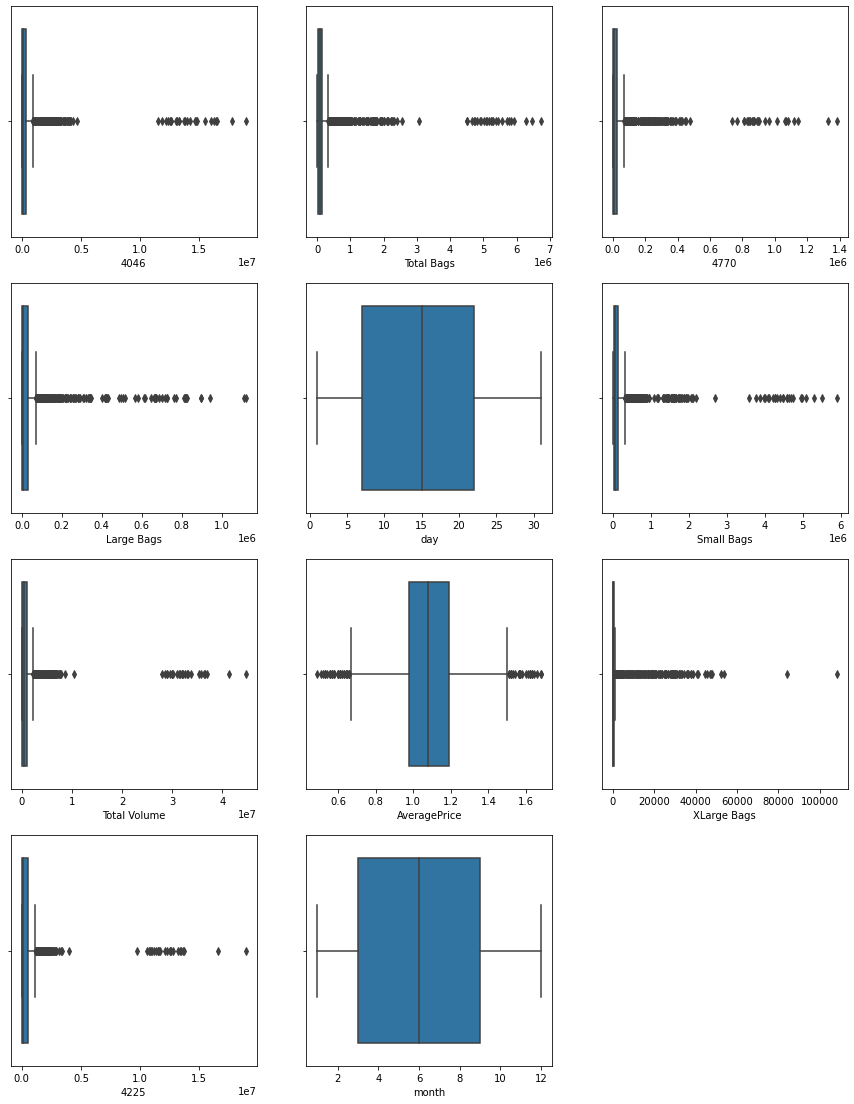

In [264]:
#plotting the numeric data

plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

Large number of outliers can be seen on all the features

In [265]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<4).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  1517
columns after applying zscore:  1471


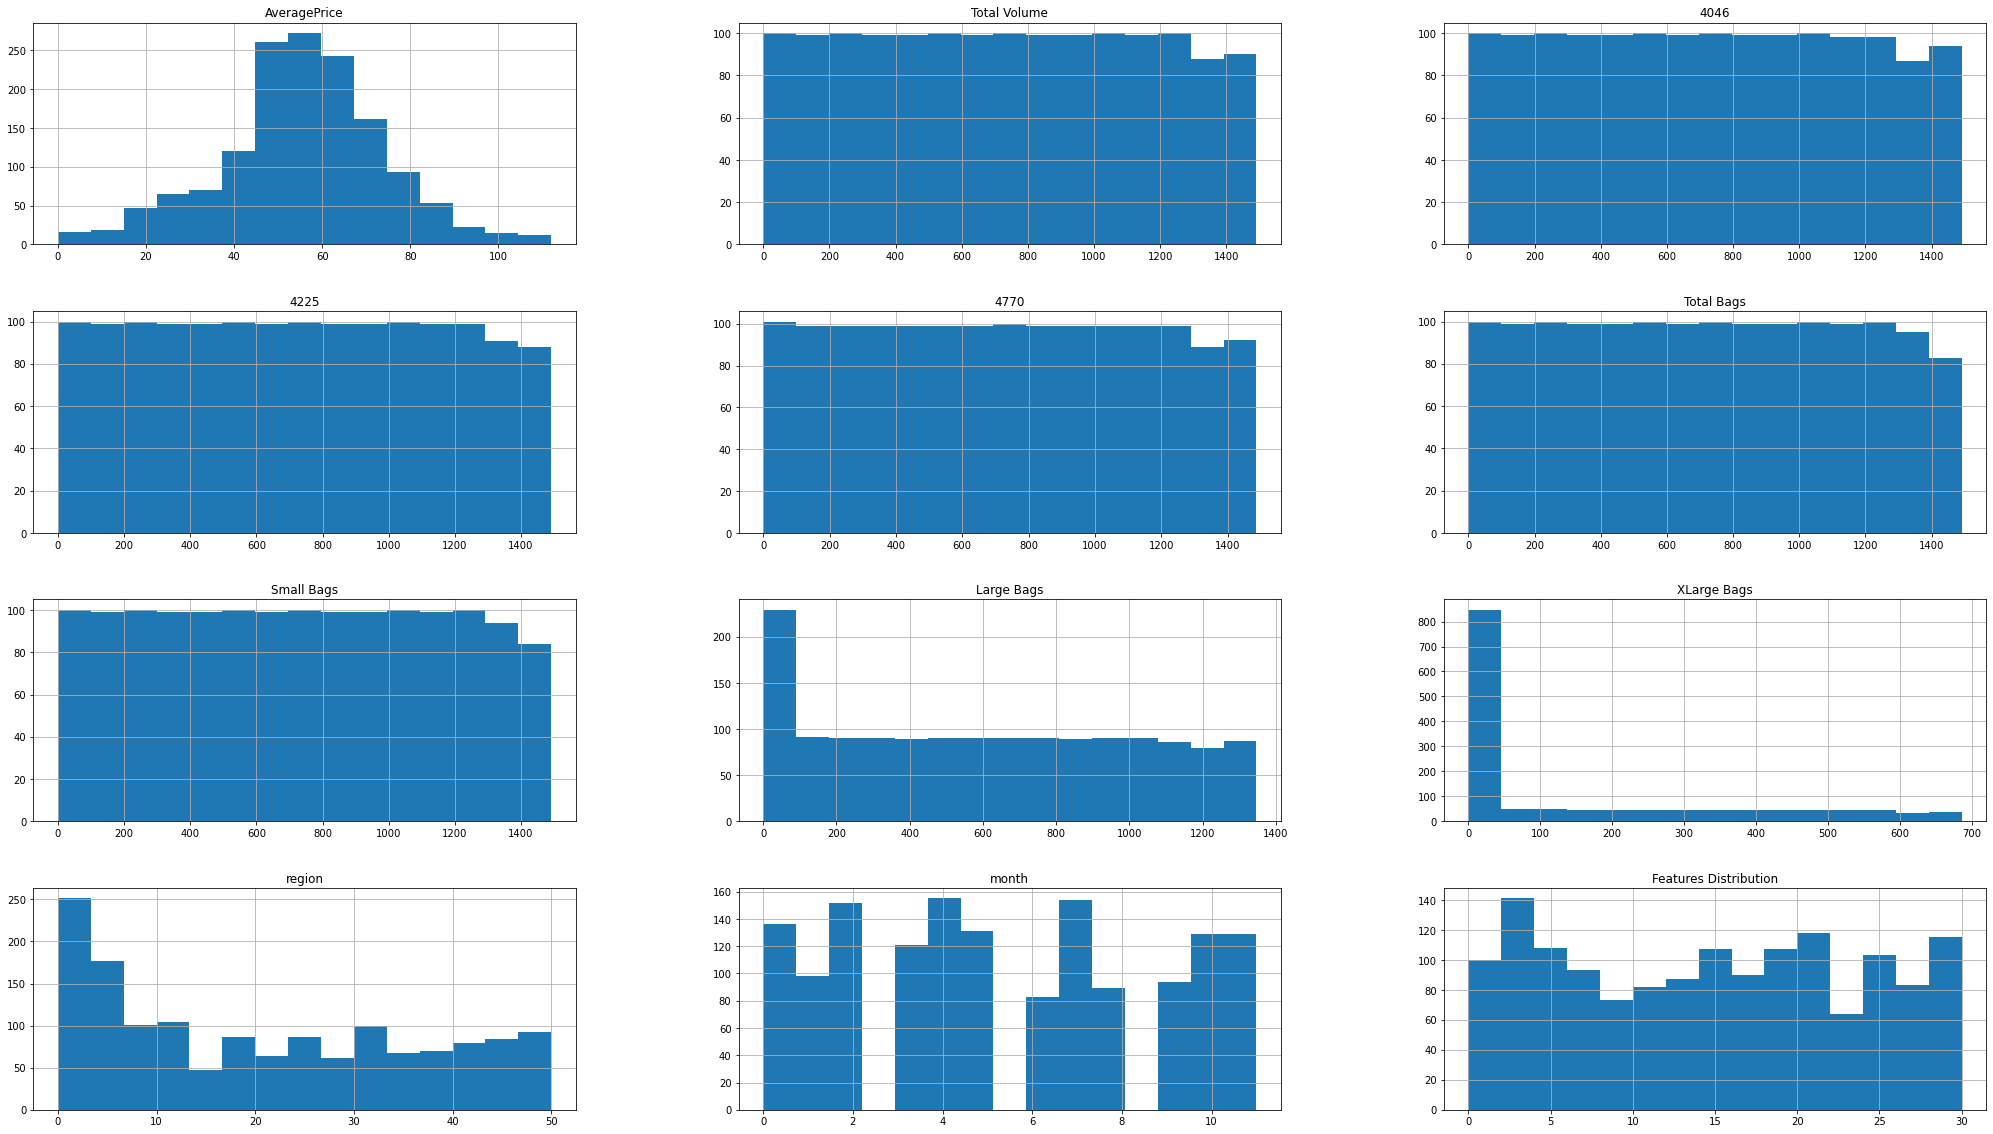

In [266]:
df=df_new

#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [267]:
# reducing skewness
num=df[{'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'month', 'day',"Total Bags","Small Bags","Large Bags","XLarge Bags"}]
num.skew()

4046            0.018491
Total Bags      0.008140
4770            0.012366
Large Bags      0.085623
day             0.045105
Small Bags      0.008919
Total Volume    0.013560
AveragePrice   -0.141405
XLarge Bags     1.098735
4225            0.013708
month           0.100475
dtype: float64

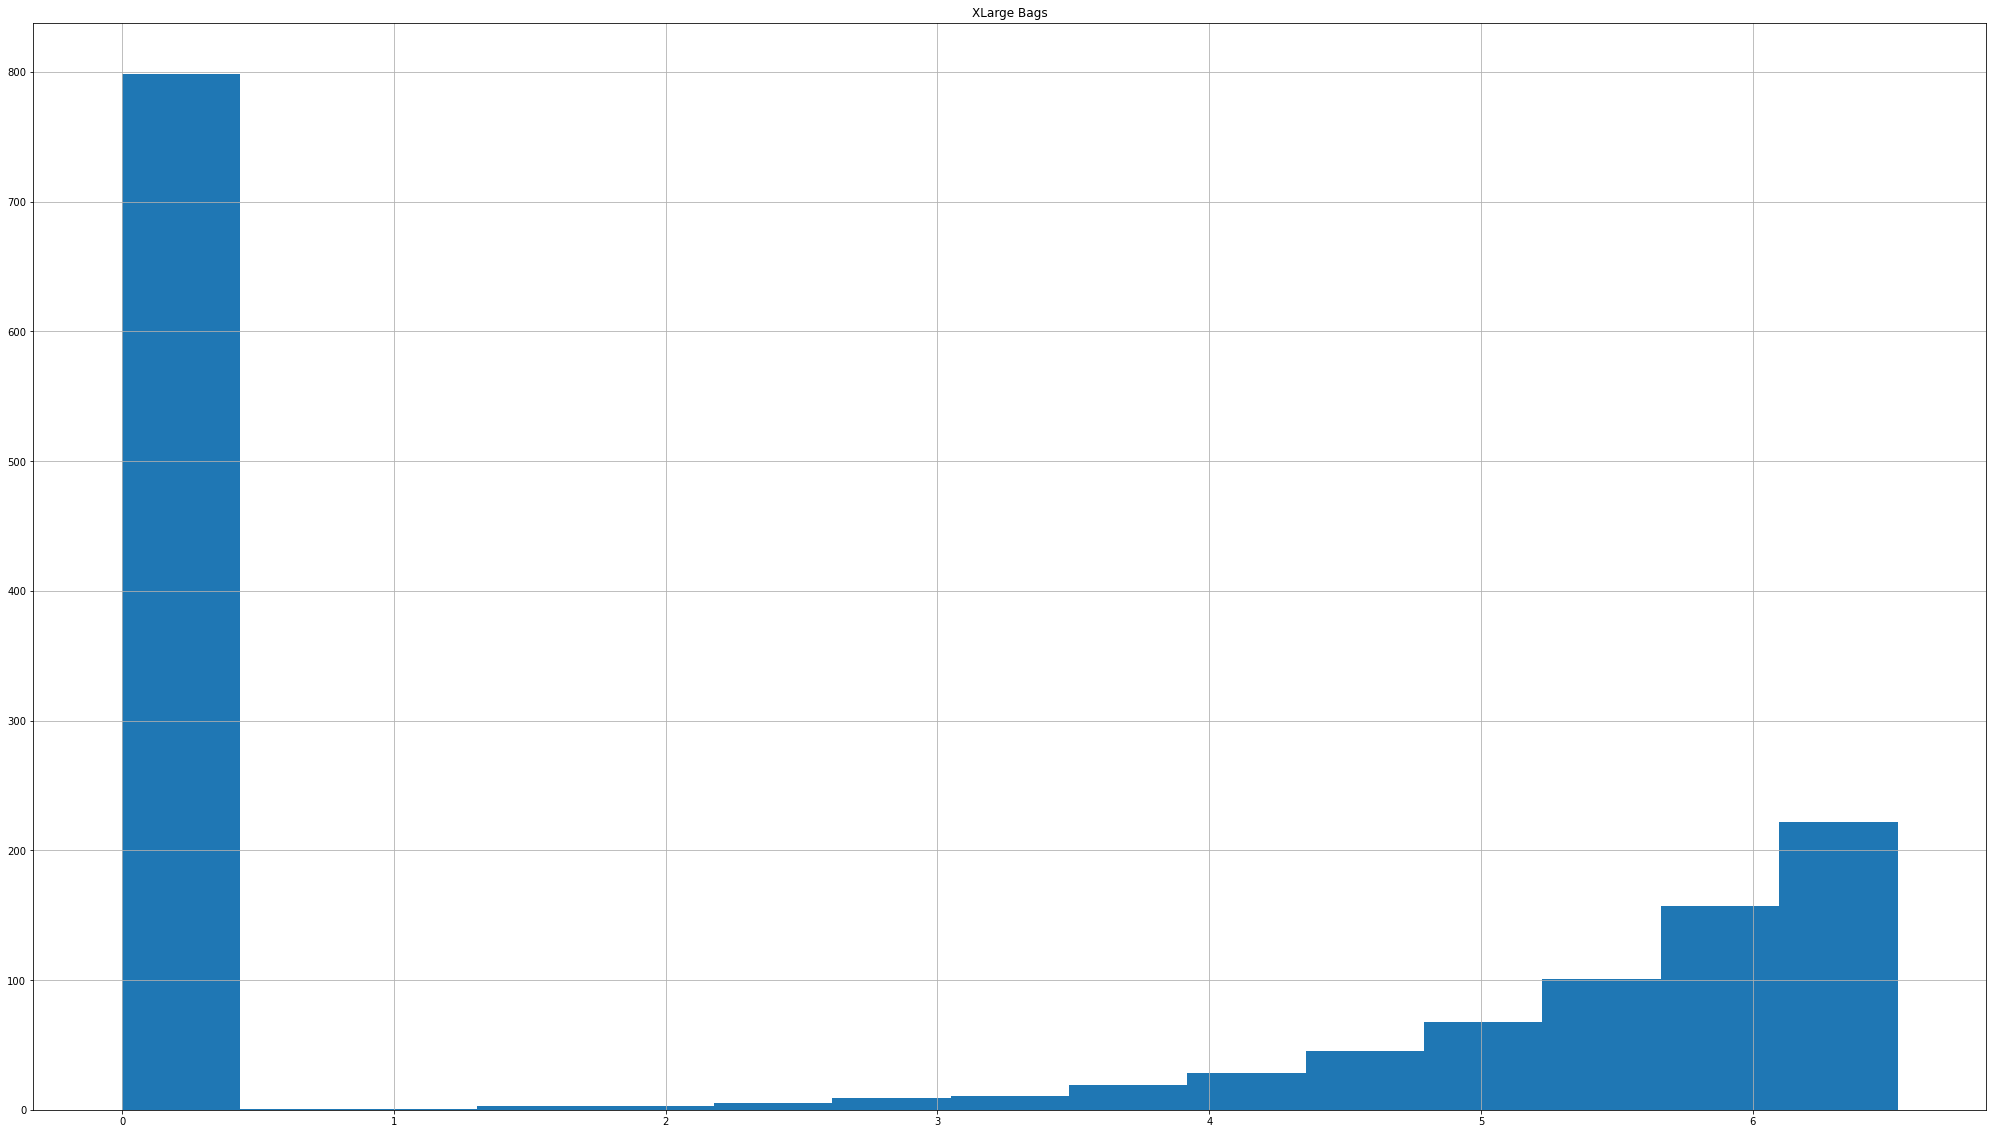

In [269]:
df['XLarge Bags']=np.log1p(df['XLarge Bags'])
df['XLarge Bags'].hist(figsize=(35,20),bins = 15)
plt.title('XLarge Bags')
plt.show()

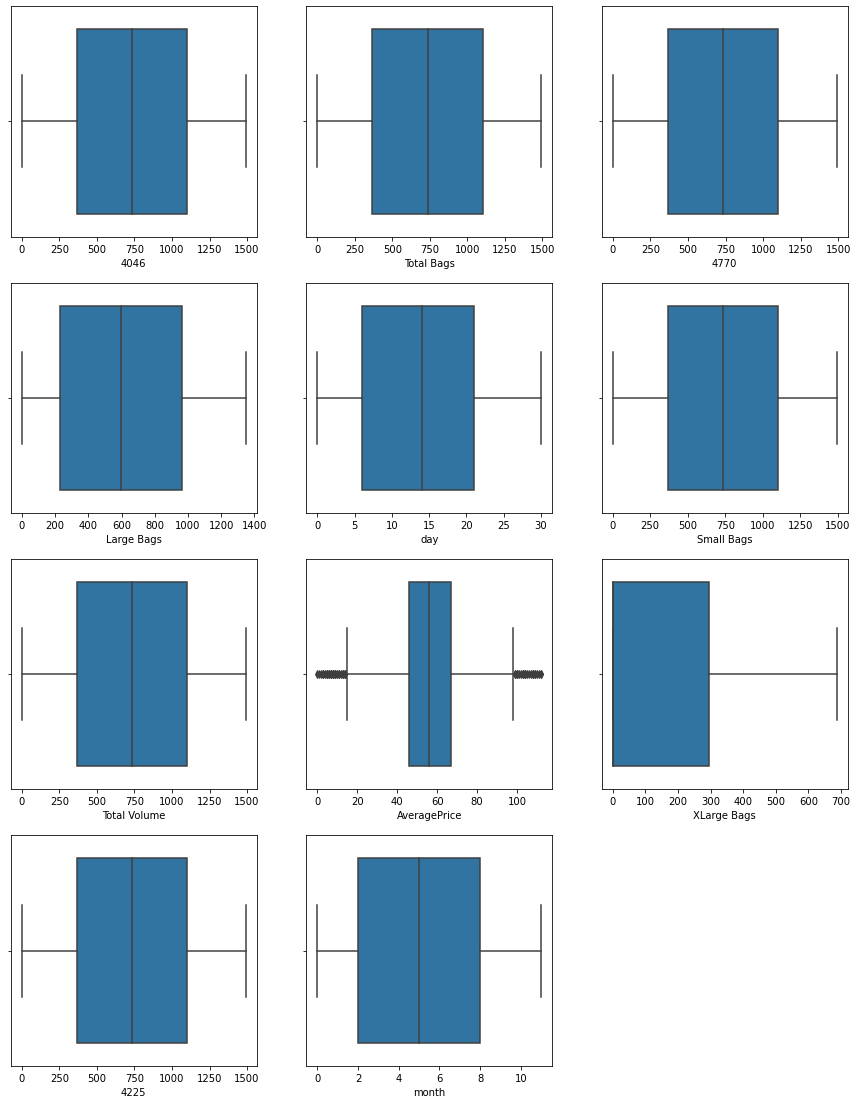

In [280]:
#plotting the numeric data

plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

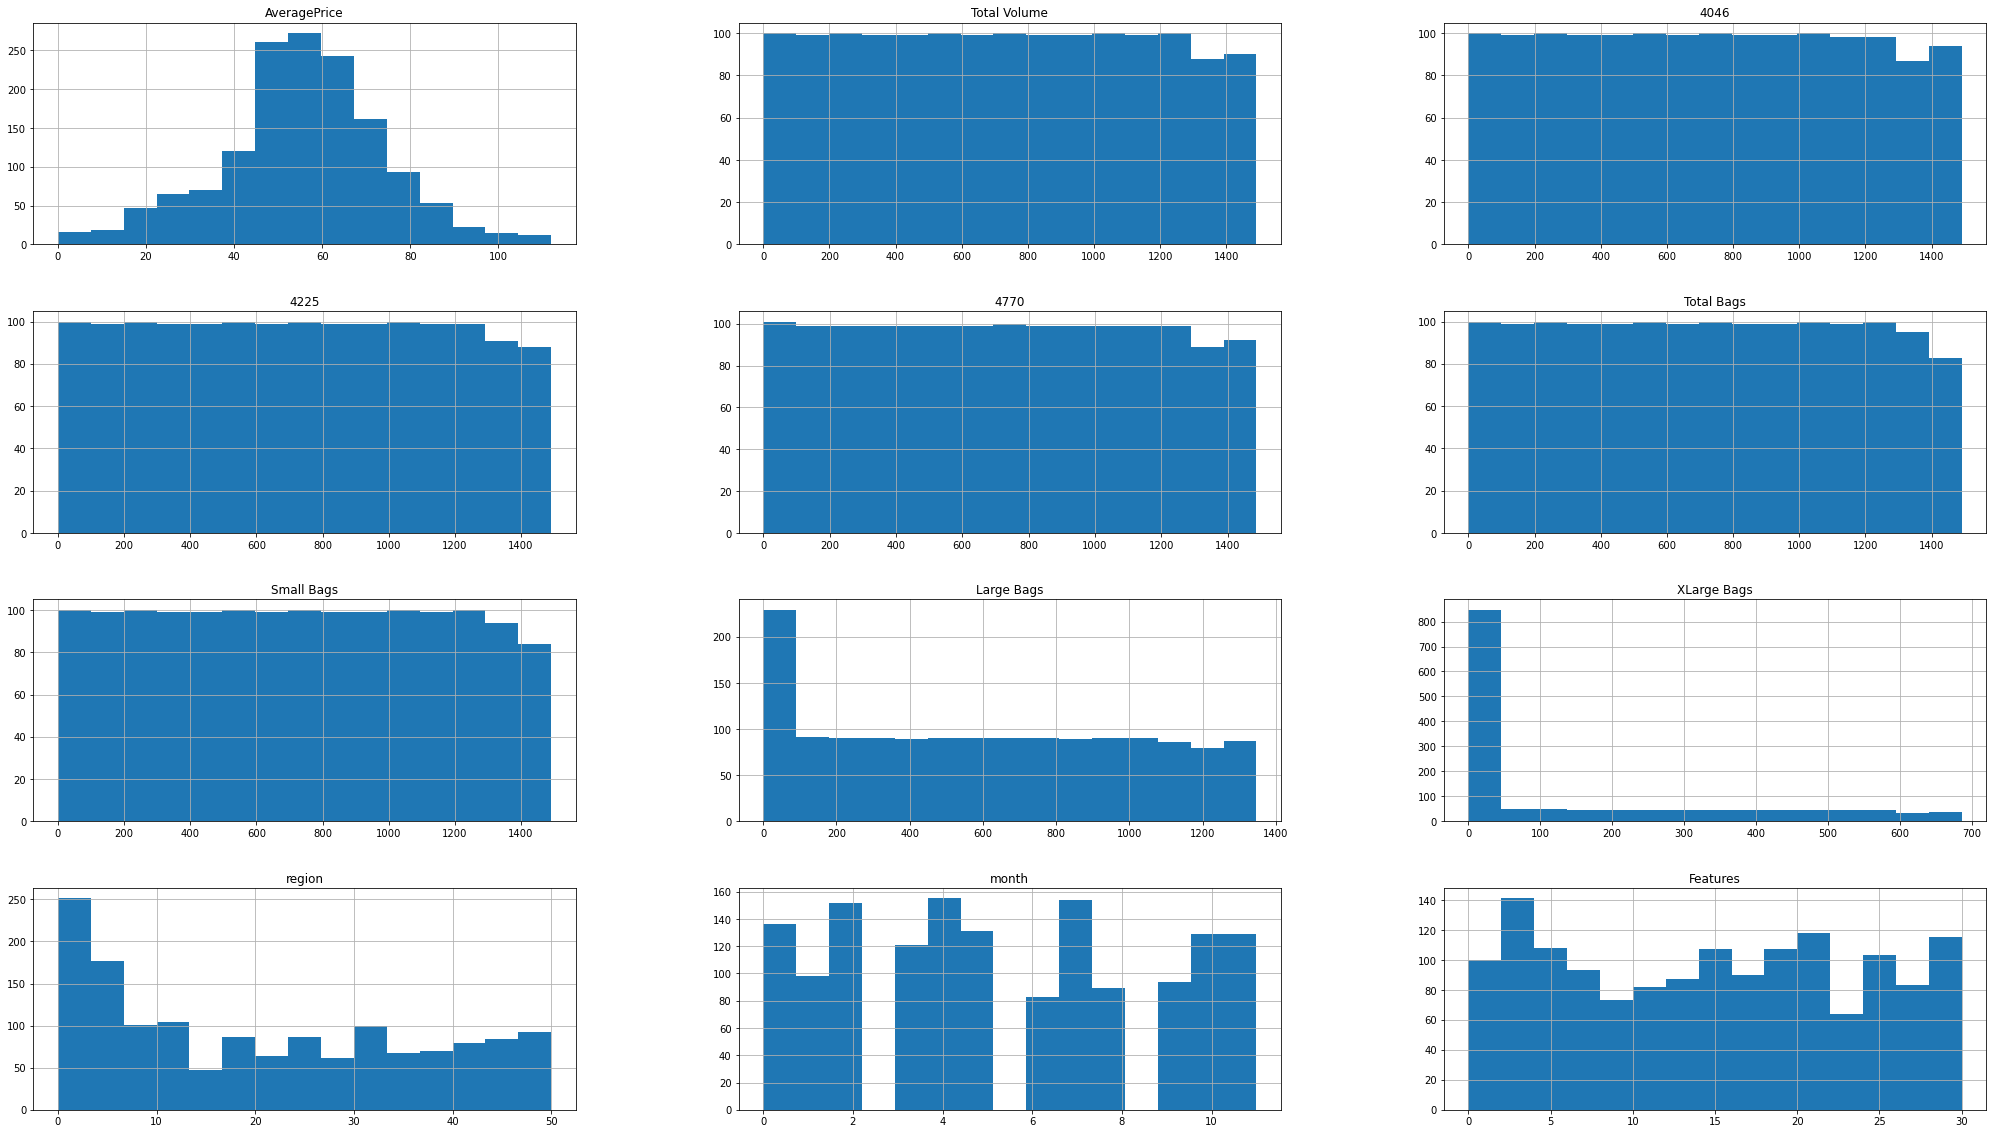

In [268]:
df.hist(figsize=(35,20),bins = 15)
plt.title("Features")
plt.show()

EDA completed on numerical data

# Checking for relationships
Checking multicollineairty with vif and heatmap

In [270]:
#vif
x=num.drop(columns=["AveragePrice"])
y=df["AveragePrice"]

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,5.458590,4046
1,45.545735,Total Bags
2,2.327602,4770
3,2.942361,Large Bags
4,1.009463,day
5,36.263968,Small Bags
6,24.768972,Total Volume
7,1.509677,XLarge Bags
8,8.899722,4225
9,1.021433,month


<AxesSubplot:>

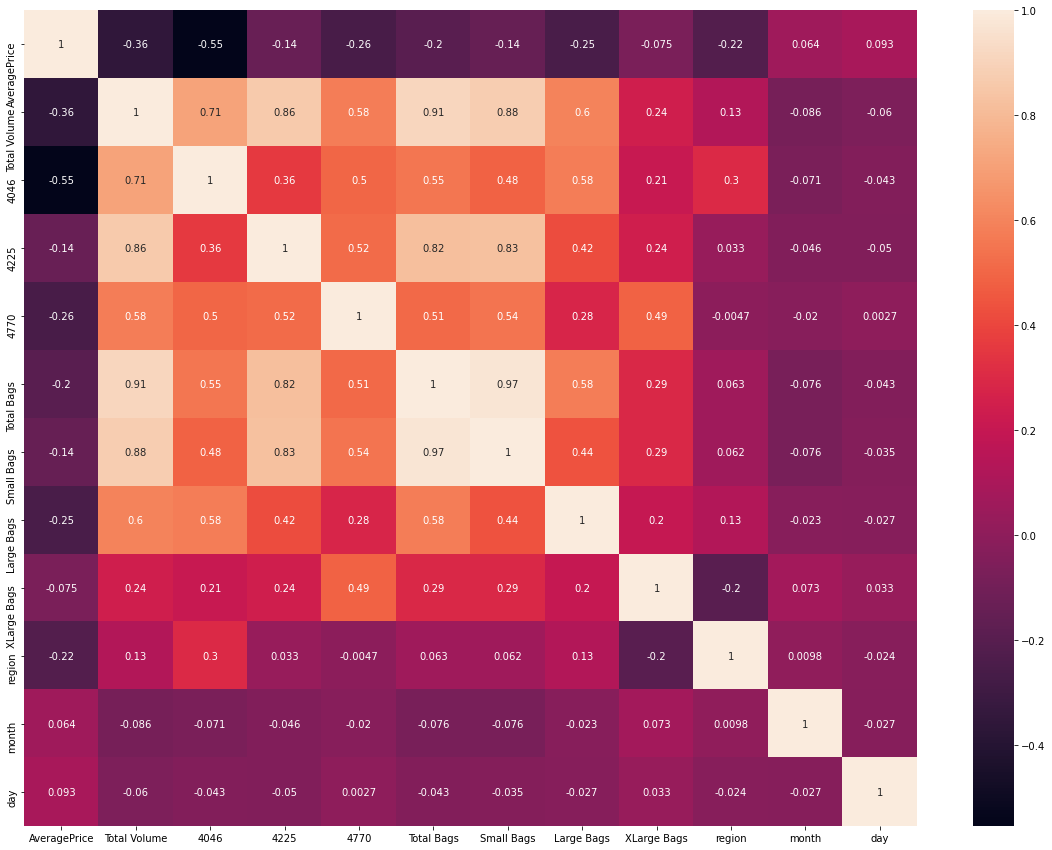

In [271]:
from matplotlib.pyplot import subplot

data_corr=df.corr()
plt.figure(figsize=(20,15))
ax=subplot(111)
sns.heatmap(data_corr,ax=ax,annot=True)

# understanding relationship between features and label

In [272]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
day             0.093272
month           0.063801
XLarge Bags    -0.074612
4225           -0.139439
Small Bags     -0.142163
Total Bags     -0.195177
region         -0.217202
Large Bags     -0.252238
4770           -0.257792
Total Volume   -0.356178
4046           -0.554395
Name: AveragePrice, dtype: float64

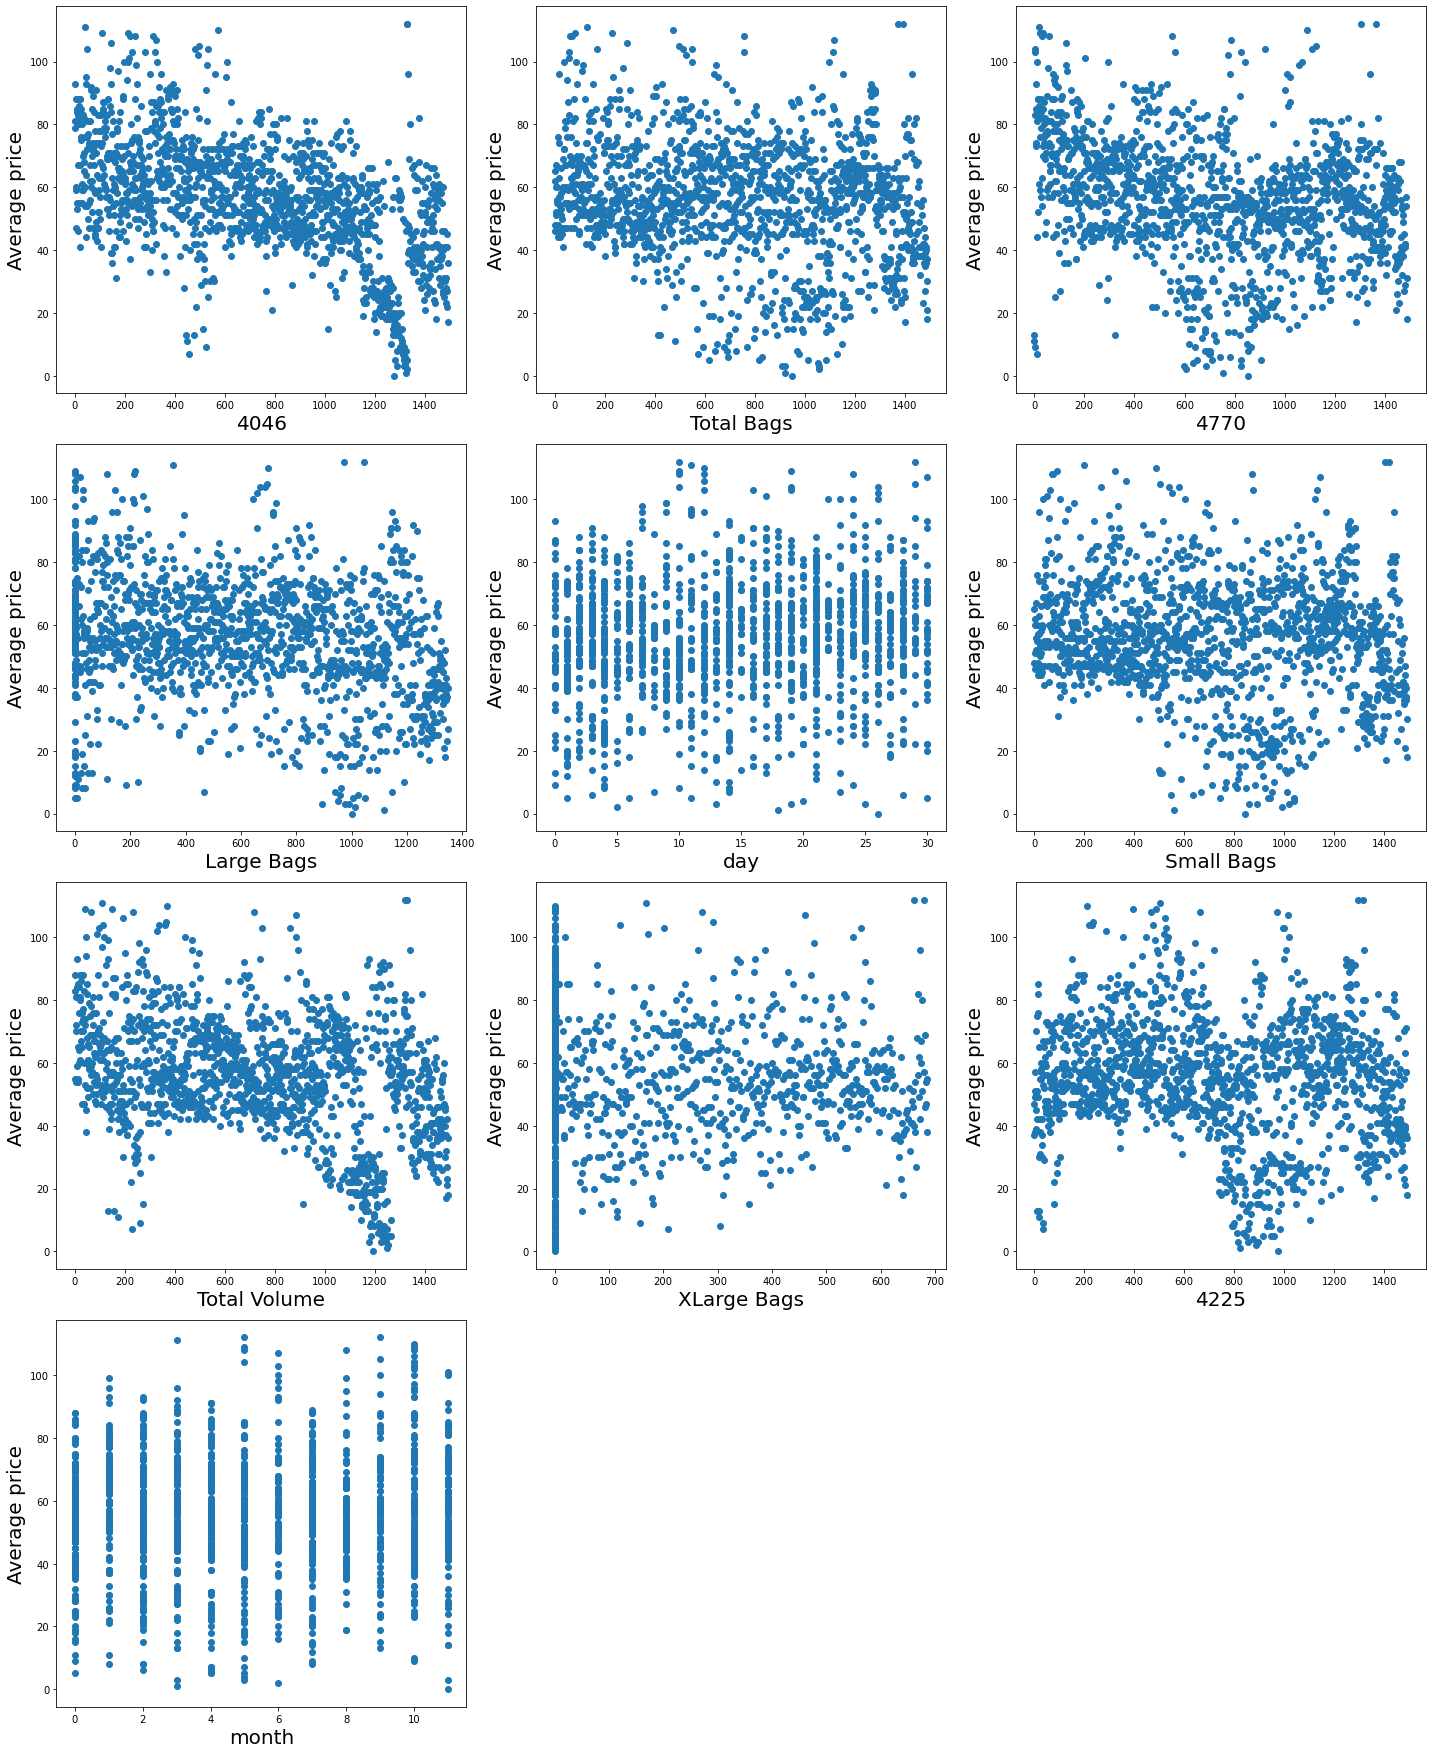

In [273]:
#visualising the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observations: 

Relationship between label and features

1.The year is playing very little relationship with out averageprice, hence can be dropped if accuracy is low

2.All the other features are normalised and show almost equal relationships

# Splitting data

In [274]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [275]:
y_train.head()

1066    47
624     55
831     71
848     41
151     67
Name: AveragePrice, dtype: int64

# Finding best random state

In [276]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month,day
0,81,71,54,506,68,41,46,78,0.000000,0,11,26
1,83,35,11,413,92,58,68,82,0.000000,0,11,19
2,41,294,22,742,194,34,39,86,0.000000,0,11,12
3,56,152,61,625,112,8,7,107,0.000000,0,5,11
4,76,27,41,406,115,12,10,143,0.000000,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,87,501,626,521,1021,602,631,769,5.676754,7,9,15
1513,99,468,527,485,1056,644,693,726,0.000000,7,8,9
1514,96,469,560,493,1007,637,682,716,5.963579,7,1,9
1515,95,495,604,495,1019,655,701,717,0.000000,7,8,24


In [277]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.3954087155211532 on Random State 199


We found best random_state value as 82% .We will create our train_test split using the random_state(198)

In [279]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.2,random_state=19)

In [281]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.3677616482587953


In [282]:
#DecisionTreeClassifier

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.3677616482587953


In [283]:
#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.3677616482587953


In [284]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())


Cross validation score of Linear Regression model : 0.14911551599056502
Cross validation score of Decision Tree model : -0.4142201062380221
Cross validation score of Random Forest model : 0.16552571331397029
